# Question 1 

##### Identify the morphological operators/filters used for the given input and output images and implement the effects using morphological operators/filters on the morphology.png image.

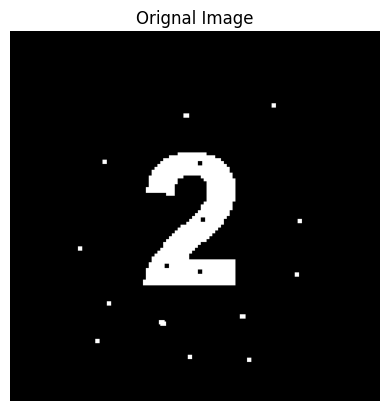

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

img = mpimg.imread('morphology.png')
plt.imshow(img)
plt.title("Orignal Image")
plt.axis('off')
plt.show()

# Two iterations of erosion 

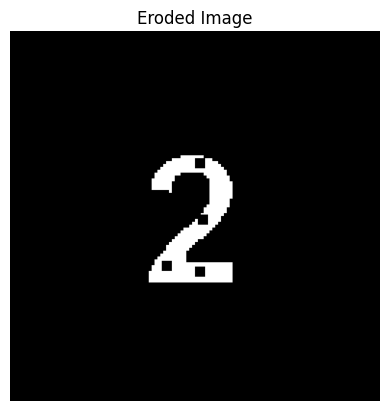

In [32]:
kernel = np.ones((3,3), np.uint8)

# two iterations of open cv erosion
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel, iterations=2)

plt.imshow(erosion, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')
plt.show()

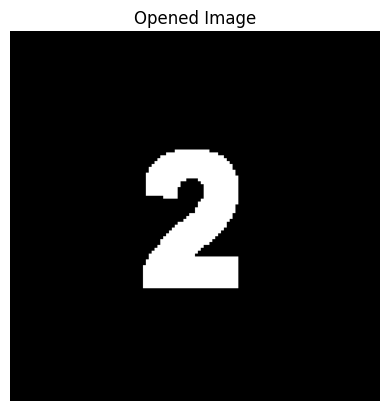

In [33]:
kernel = np.ones((3,3), np.uint8)

erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel, iterations=2)
dialate = cv.morphologyEx(erosion, cv.MORPH_DILATE, kernel, iterations=4)

plt.imshow(dialate, cmap='gray')
plt.title("Opened Image")
plt.axis('off')
plt.show()

# Question 2

##### Apply both morphological and median filters on the fingerprint image (fingerprint_BW.png). Compare the result and comment under what condition, one filter might perform better than the othe

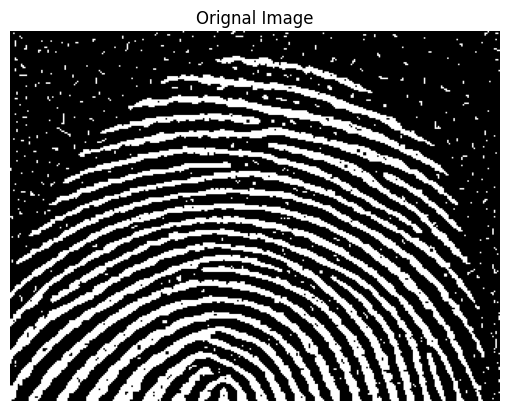

In [34]:
fingerprints = mpimg.imread('fingerprint_BW.png')

plt.imshow(fingerprints)
plt.title("Orignal Image")
plt.axis('off')
plt.show()

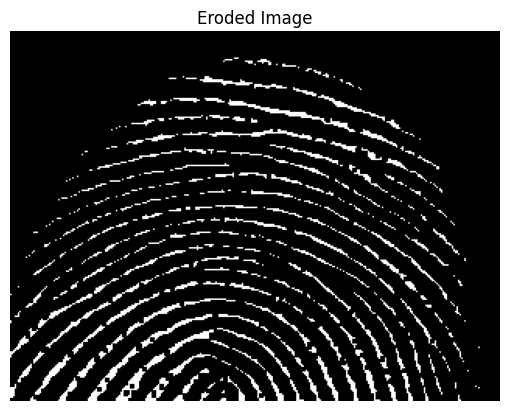

In [35]:
erosion = cv.morphologyEx(fingerprints, cv.MORPH_ERODE, kernel, iterations=1)

plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()

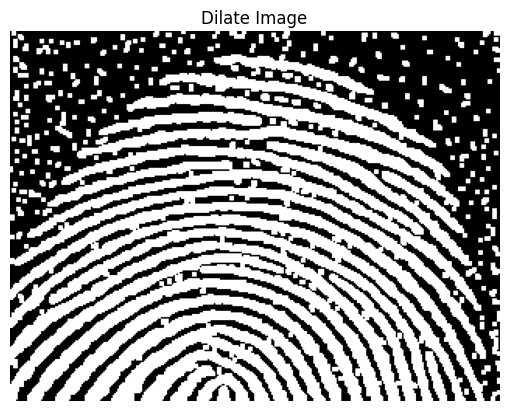

In [36]:
dialate = cv.morphologyEx(fingerprints, cv.MORPH_DILATE, kernel, iterations=1)

plt.imshow(dialate, cmap='gray')
plt.title('Dilate Image')
plt.axis('off')
plt.show()

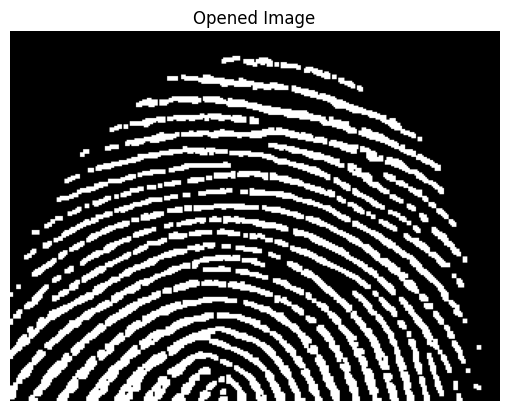

In [37]:
opening = cv.morphologyEx(fingerprints, cv.MORPH_OPEN, kernel, iterations=1)

plt.imshow(opening, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.show()

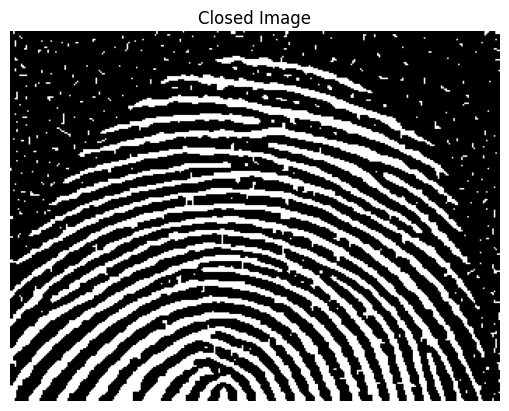

In [38]:
closing = cv.morphologyEx(fingerprints, cv.MORPH_CLOSE, kernel, iterations=1)

plt.imshow(closing, cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.show()

# Question 3

##### For the cell.jpg image, write a code to count the total number of cells, calculate the size of each cell in pixels, and show the boundary of the biggest cell in an output image. In your code, you might use any techniques covered in this class. Hint: Thresholding, morphological filters, connected components, etc. 

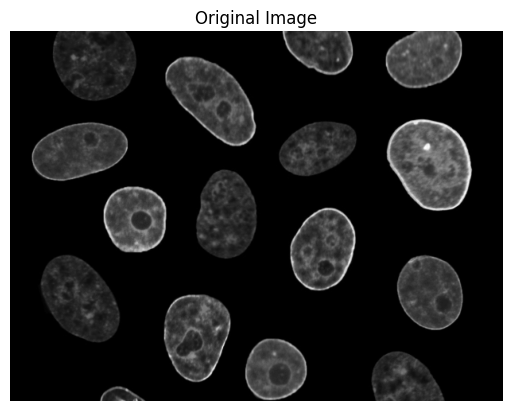

In [39]:
cellImg = cv.imread('cell.jpg', cv.IMREAD_GRAYSCALE)

plt.imshow(cellImg, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

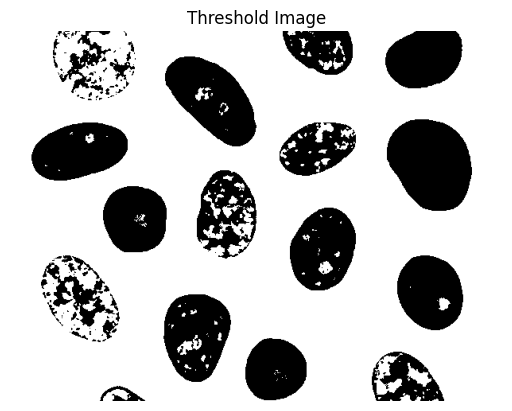

In [40]:
_, threshCell = cv.threshold(cellImg, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

plt.imshow(threshCell, cmap='gray')
plt.axis('off')
plt.title('Threshold Image')
plt.show()

In [41]:
# cellEdges = cv.Canny(threshCell, 100, 200)

# plt.imshow(cellEdges, cmap='gray')
# plt.axis('off')
# plt.title('Threshold Image')
# plt.show()

In [42]:
# _, threshCell = cv.threshold(cellEdges, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# plt.imshow(threshCell, cmap='gray')
# plt.axis('off')
# plt.title('Threshold Image')
# plt.show()

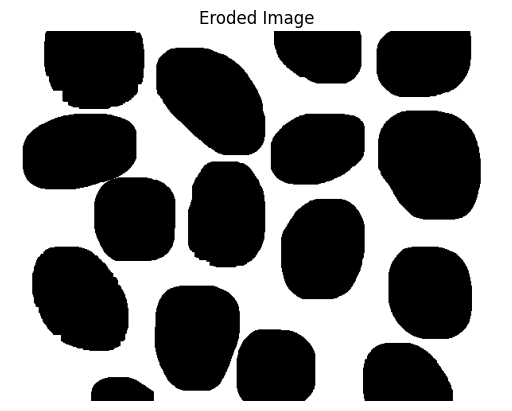

In [43]:
morphCell = cv.morphologyEx(threshCell, cv.MORPH_ERODE, kernel, iterations=11)
# morphCell = cv.morphologyEx(morphCell, cv.MORPH_DILATE, kernel, iterations=3)



plt.imshow(morphCell, cmap='gray')
plt.axis('off')
plt.title('Eroded Image')
plt.show()

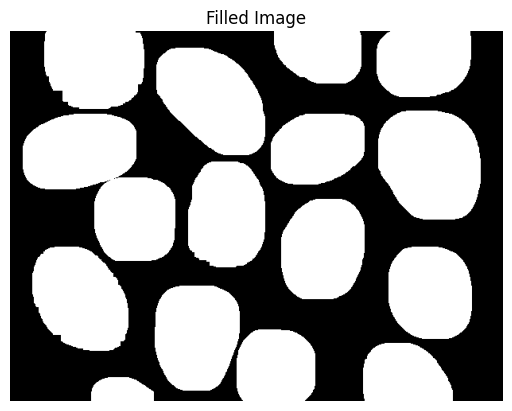

In [44]:
height, width = threshCell.shape
mask = np.zeros((height + 2, width + 2), np.uint8)

# Flood fill from point (0, 0)
cv.floodFill(morphCell, mask, (0, 0), 255)

# Invert the image to get filled areas
filledCell = cv.bitwise_not(morphCell)

plt.imshow(filledCell, cmap='gray')
plt.axis('off')
plt.title('Filled Image')
plt.show()

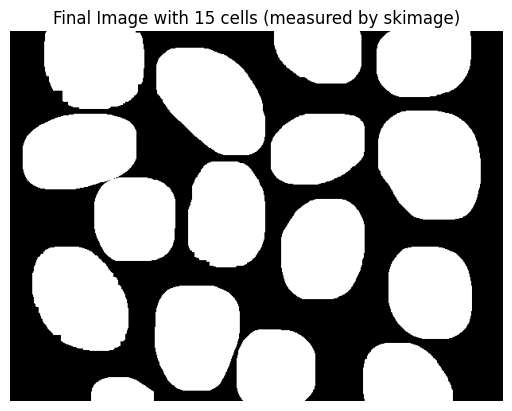

In [45]:
from skimage import measure

# Count total cells (connected components excluding the background)
labels = measure.label(filledCell , connectivity=2, background=0)

# Count total cells (connected components excluding the background)
cell_count = labels.max()

plt.imshow(filledCell, cmap='gray')
plt.axis('off')
plt.title(f'Final Image with {cell_count} cells (measured by skimage)')
plt.show()